In [1]:
import pandas as pd
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt

# progressInstalled = False
# try:
#     from progress.bar import ChargingBar
# except:
#     progressInstalled = False

sets = set(['a','b','c','d','e'])

def loadData(src,datasets= ['a','b','c','d','e'] , size=180, mode='RGB', rng=0):
    m = {'RGB': 3, 'L': 1, '1': 1}
    inputs = []
    outputs = []
    datasets = [i for i in datasets if i in sets]
    if datasets == []:
        datasets = ['a','b','c','d','e']
    for dataset in datasets:
        labels = pd.read_csv(src + "/training-{0}.csv".format(dataset))
        if rng == 0:
            labels = labels[['filename', 'digit']]
        else:
            labels = labels[['filename', 'digit']][rng[0]:rng[1]]
        Y = np.array(labels['digit'],dtype=np.uint8)
        length = len(labels)
        X = np.zeros((length, size, size, m[mode]))
        num = 0
        # if progressInstalled:
        #     bar = ChargingBar('Loading Training Set {0}'.format(dataset),max = len(labels),
        #                       suffix='%(index)d/%(max)d - %(percent).1f%% - %(eta)ds')
        for i in labels['filename']:
            img = Image.open(src + "/training-{0}/".format(dataset) + i)
            c = img.resize((size, size))
            c = np.array(c.convert(mode), dtype=np.uint8).reshape((size,size,m[mode]))
            X[num, :, :, :] = c
            num = num + 1
            # if progressInstalled and (not num % max(1,(length / 200))):
            #     bar.index = num
            #     bar.update()
            # else:
            #     if (not num % (length / 20)):
            #         print("Loaded Training Set {0}:. ".format(dataset) + str(num) + "/" + str(length))
            if (not num % (length / 20)):
                print("Loaded Training Set {0}:. ".format(dataset) + str(num) + "/" + str(length))
        # if progressInstalled:
        #     bar.finish()
        inputs.append(X)
        outputs.append(Y)

    X = np.concatenate(inputs,axis = 0)
    Y = np.concatenate(outputs,axis = 0)
    return (X, Y)


def show_digit(x,label):
    plt.axis('off')
    l = x.shape[1]
    m = x.shape[2]
    if m == 1:
        plt.imshow(x.reshape((l,l)), cmap=plt.cm.gray)
    else:
        plt.imshow(x.reshape((l, l, m)))
    #plt.title(label)
    plt.show()
    return


def vis_image(index, X, Y):
    label = Y[index]
    show_digit(X[index, :, :, :],label)
    print("Label " + str(label))
    return

In [2]:
X,Y = loadData("../input/",size = 28, mode = 'L',rng = (0,5500))

Loaded Training Set a:. 275/5500
Loaded Training Set a:. 550/5500
Loaded Training Set a:. 825/5500
Loaded Training Set a:. 1100/5500
Loaded Training Set a:. 1375/5500
Loaded Training Set a:. 1650/5500
Loaded Training Set a:. 1925/5500
Loaded Training Set a:. 2200/5500
Loaded Training Set a:. 2475/5500
Loaded Training Set a:. 2750/5500
Loaded Training Set a:. 3025/5500
Loaded Training Set a:. 3300/5500
Loaded Training Set a:. 3575/5500
Loaded Training Set a:. 3850/5500
Loaded Training Set a:. 4125/5500
Loaded Training Set a:. 4400/5500
Loaded Training Set a:. 4675/5500
Loaded Training Set a:. 4950/5500
Loaded Training Set a:. 5225/5500
Loaded Training Set a:. 5500/5500
Loaded Training Set c:. 275/5500
Loaded Training Set c:. 550/5500
Loaded Training Set c:. 825/5500
Loaded Training Set c:. 1100/5500
Loaded Training Set c:. 1375/5500
Loaded Training Set c:. 1650/5500
Loaded Training Set c:. 1925/5500
Loaded Training Set c:. 2200/5500
Loaded Training Set c:. 2475/5500
Loaded Training Set 

In [3]:
X.shape

(22359, 28, 28, 1)

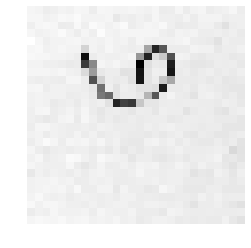

Label 3


In [4]:
vis_image(1,X/255.0,Y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.1, random_state=42)

In [7]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

In [9]:
flat_X_train = np.reshape(X_train,newshape=(X_train.shape[0],-1)) 
flat_X_test = np.reshape(X_test,newshape=(X_test.shape[0],-1))
flat_X_val = np.reshape(X_val,newshape=(X_val.shape[0],-1))

In [10]:
kVals = range(1, 30, 2)
accuracies = []

In [11]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 30, 2):
    
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(flat_X_train, y_train)
    # evaluate the model and update the accuracies list
    score = model.score(flat_X_val, y_val)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=58.39%
k=3, accuracy=54.96%
k=5, accuracy=57.42%
k=7, accuracy=57.64%
k=9, accuracy=57.54%
k=11, accuracy=57.69%
k=13, accuracy=57.79%
k=15, accuracy=57.84%
k=17, accuracy=57.39%
k=19, accuracy=57.07%
k=21, accuracy=56.65%
k=23, accuracy=56.52%
k=25, accuracy=55.95%
k=27, accuracy=56.02%
k=29, accuracy=56.10%


In [12]:
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=1 achieved highest accuracy of 58.39% on validation data


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(flat_X_train, y_train)
predictions = knn_model.predict(flat_X_test)

In [17]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
% (knn_model, metrics.classification_report(y_test, predictions)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

           0       0.51      0.70      0.59       236
           1       0.49      0.60      0.54       245
           2       0.51      0.59      0.55       193
           3       0.52      0.59      0.55       192
           4       0.74      0.50      0.60       218
           5       0.53      0.49      0.51       243
           6       0.54      0.55      0.55       246
           7       0.70      0.70      0.70       230
           8       0.75      0.74      0.74       223
           9       0.60      0.29      0.39       210

   micro avg       0.58      0.58      0.58      2236
   macro avg       0.59      0.58      0.57      2236
weighted avg       0.59      0.58      0.57      2236




In [18]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(y_test, predictions)))

Confusion matrix:
[[166  16   3   8   3   6   5  20   6   3]
 [ 25 146  17   6   4   8  10   2   5  22]
 [  8  35 113   4   2  10   7   6   3   5]
 [ 14   8   2 114   2  11  33   6   2   0]
 [ 29   9  18   9 109  16   9  10   9   0]
 [ 29  10  13  19  11 120  25   7   5   4]
 [ 10  10   8  46   3  24 136   2   7   0]
 [ 12  12  11   3   2  10   7 162   8   3]
 [ 13   4  12   6   5   7   4   5 164   3]
 [ 19  50  23   4   6  13  14  11  10  60]]
Accuracy=0.5769230769230769


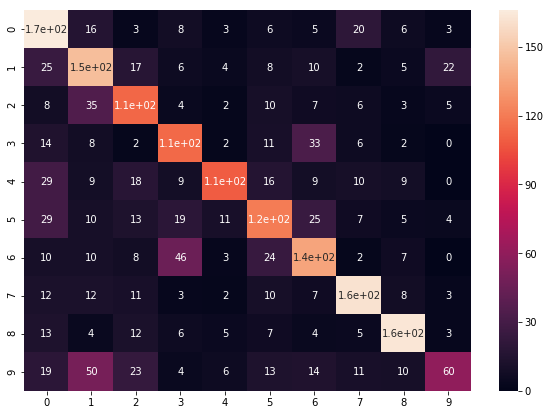

In [19]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm.tolist(), index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

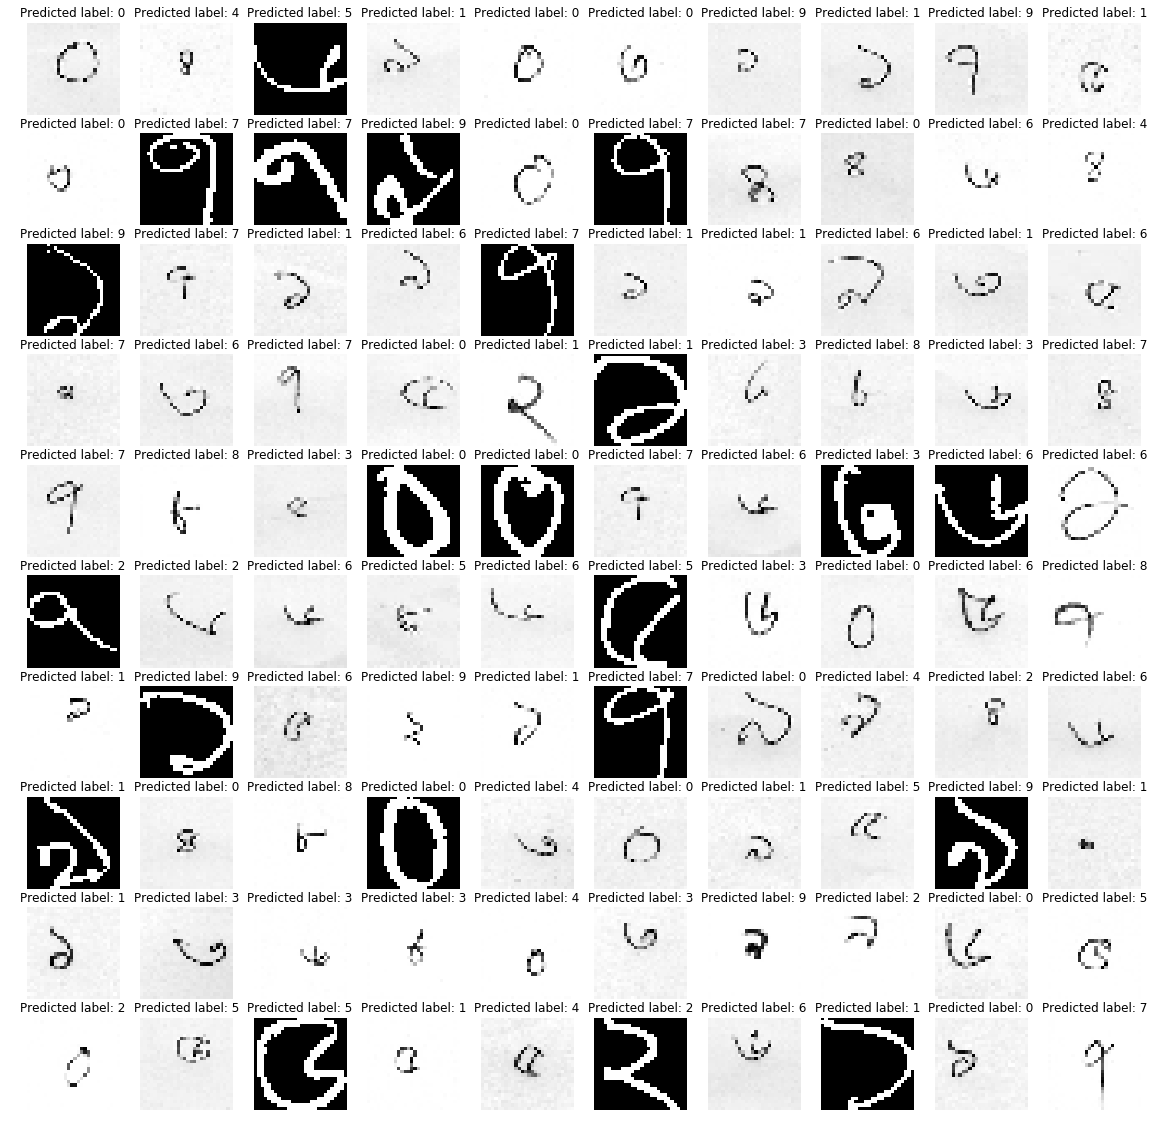

In [20]:
image_per_row = 10
image_per_col = 10
N = image_per_row * image_per_col
random_index = np.random.randint(0, X_test.shape[0], (N))
fig = plt.figure(figsize=(2 * image_per_col, 2 * image_per_row))
for i in range(N):
    idx = random_index[i]
    plt.subplot(image_per_row, image_per_col, i + 1)
    plt.axis('off')
    plt.imshow(flat_X_test[idx].reshape(28,28), cmap='gray')
    plt.title('Predicted label: ' + str(predictions[idx]))
plt.show()